In [1]:
# Importing the necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'

In [150]:
path = 'UTKFace_Eth'
files = os.listdir(path) # listdir gives us a list of all the files in this directory. AKA, all the image files

In [151]:
# Here we split our data into training and testing 
train_files, test_files = train_test_split(files, test_size=0.2) 

In [152]:
# Creating folders for train and test 
train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)

In [153]:
# Move training files to the training folder

for file in train_files:
    src_path = os.path.join(path, file)
    dst_path = os.path.join(train_path, file)
    shutil.move(src_path, dst_path)

# Move testing files to the testing folder    
for file in test_files:
    src_path = os.path.join(path, file)
    dst_path = os.path.join(test_path, file)
    shutil.move(src_path, dst_path)
    


In [154]:
train_path = "./UTKFace_Eth/train"
train_files = os.listdir(train_path)

test_path = "./UTKFace_Eth/test"
test_files = os.listdir(test_path)

In [155]:
race_dict = {'0': 'White', '1': 'Black', '2': 'Asian', '3': 'Indian', '4': 'Others'}

for filename in train_files:
    race_num = filename.split('_')[2]
    if race_num not in ['0', '1', '2', '3', '4']: # Case where they were not given an ethnicity
        src_path = os.path.join(train_path, filename)
        os.remove(src_path) # Get rid of the file, and then move on to next one
        continue
    race = race_dict[race_num]
    desired_path = os.path.join(train_path, race)
    
    if not os.path.exists(desired_path):
        os.makedirs(desired_path)
        
    src_path = os.path.join(train_path, filename)
    dst_path = os.path.join(desired_path, filename)
    shutil.copy(src_path, dst_path) # Copy it to the destination
    os.remove(src_path) 


In [156]:
for filename in test_files:
    race_num = filename.split('_')[2]
    if race_num not in ['0', '1', '2', '3', '4']: # Case where they were not given an ethnicity
        src_path = os.path.join(test_path, filename)
        os.remove(src_path) # Get rid of the file, and then move on to next one
        continue
    race = race_dict[race_num]
    desired_path = os.path.join(test_path, race)
    
    if not os.path.exists(desired_path):
        os.makedirs(desired_path)
        
    src_path = os.path.join(test_path, filename)
    dst_path = os.path.join(desired_path, filename)
    shutil.copy(src_path, dst_path) # Copy it to the destination
    os.remove(src_path) 

In [157]:
## START HERE (don't re-run earlier blocks)

In [ ]:
train_path = "./UTKFace_Eth/train"
test_path = "./UTKFace_Eth/test"


In [ ]:
checkpoints_directory = os.path.join(train_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_directory):
    os.rmdir(checkpoints_directory)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = (200, 200), # We are cropping the images to 200x200
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   color_mode = 'rgb',
                                                   subset = 'training')
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                  color_mode = 'rgb',
                                                 shuffle = False)

In [ ]:
test_generator.classes

In [ ]:
train_generator.classes

In [ ]:
images, labels = next(train_generator)

# Display the first 5 images and their categories
for i in range(5):
    category_index = labels[i].argmax()
    category_name = list(train_generator.class_indices.keys())[category_index]
    plt.imshow(images[i])
    plt.title('Ethnicity: ' + category_name)
    plt.show()

In [165]:
# Building the model

model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2,2))) #Max pooling layer with a pool size of (2,2)
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax')) # 5 classes to predict




In [166]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = "adam",
             metrics = ["accuracy"])

In [167]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=20,
                             validation_data = test_generator,
                             validation_steps = 50)

Epoch 1/20


/var/folders/j5/g8sfg5_14_v3_nt_gk053jyr0000gn/T/ipykernel_18944/3792760769.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
2023-06-03 14:53:09.846531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 1.4509 - accuracy: 0.4306

2023-06-03 14:54:30.300411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 91s 896ms/step - loss: 1.4509 - accuracy: 0.4306 - val_loss: 1.5295 - val_accuracy: 0.5144
Epoch 2/20
100/100 [==============================] - 89s 888ms/step - loss: 1.3063 - accuracy: 0.4903 - val_loss: 1.3110 - val_accuracy: 0.5350
Epoch 3/20
100/100 [==============================] - 81s 810ms/step - loss: 1.0995 - accuracy: 0.5850 - val_loss: 0.9281 - val_accuracy: 0.6762
Epoch 4/20
100/100 [==============================] - 79s 792ms/step - loss: 0.9859 - accuracy: 0.6447 - val_loss: 0.9619 - val_accuracy: 0.6594
Epoch 5/20
100/100 [==============================] - 82s 816ms/step - loss: 0.9243 - accuracy: 0.6612 - val_loss: 0.8073 - val_accuracy: 0.7306
Epoch 6/20
100/100 [==============================] - 82s 822ms/step - loss: 0.8998 - accuracy: 0.6778 - val_loss: 0.8431 - val_accuracy: 0.7106
Epoch 7/20
100/100 [==============================] - 87s 874ms/step - loss: 0.8713 - accuracy: 0.6950 - val_loss: 1.0075 - val_accuracy: 0.6

In [168]:
model.save('eth_cnn_model')

2023-06-03 15:21:05.361454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,99,99,32]
	 [[{{node inputs}}]]
2023-06-03 15:21:05.376041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,48,48,64]
	 [[{{node inputs}}]]
2023-06-03 15:21:05.390340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,23,23,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: eth_cnn_model/assets


INFO:tensorflow:Assets written to: eth_cnn_model/assets


In [176]:
model3 = models.Sequential()

model3.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 3)))
model3.add(layers.MaxPooling2D((2,2))) #Max pooling layer with a pool size of (2,2)
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Flatten())
model3.add(layers.Dense(5, activation='softmax')) # 5 classes to predict

In [177]:
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = "adam",
             metrics = ["accuracy"])

In [178]:
model3_history = model3.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=30,
                             validation_data = test_generator,
                             validation_steps = 50)

Epoch 1/30


/var/folders/j5/g8sfg5_14_v3_nt_gk053jyr0000gn/T/ipykernel_18944/1451510232.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3_history = model3.fit_generator(train_generator,
2023-06-03 20:19:38.083444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 1.4254 - accuracy: 0.4309

2023-06-03 20:21:02.203319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 96s 949ms/step - loss: 1.4254 - accuracy: 0.4309 - val_loss: 1.5535 - val_accuracy: 0.2262
Epoch 2/30
100/100 [==============================] - 90s 895ms/step - loss: 1.2610 - accuracy: 0.5278 - val_loss: 0.9120 - val_accuracy: 0.6744
Epoch 3/30
100/100 [==============================] - 90s 899ms/step - loss: 1.0478 - accuracy: 0.6150 - val_loss: 0.9494 - val_accuracy: 0.6631
Epoch 4/30
100/100 [==============================] - 94s 944ms/step - loss: 0.9731 - accuracy: 0.6494 - val_loss: 0.9599 - val_accuracy: 0.7031
Epoch 5/30
100/100 [==============================] - 94s 939ms/step - loss: 0.9194 - accuracy: 0.6659 - val_loss: 0.9417 - val_accuracy: 0.6550
Epoch 6/30
100/100 [==============================] - 83s 828ms/step - loss: 0.8822 - accuracy: 0.6819 - val_loss: 0.7023 - val_accuracy: 0.7869
Epoch 7/30
100/100 [==============================] - 87s 867ms/step - loss: 0.8467 - accuracy: 0.7047 - val_loss: 0.8967 - val_accuracy: 0.7

In [179]:
model3.save('eth_cnn_model_85%')

2023-06-03 21:16:37.268393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,99,99,32]
	 [[{{node inputs}}]]
2023-06-03 21:16:37.286393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,48,48,64]
	 [[{{node inputs}}]]
2023-06-03 21:16:37.304531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,23,23,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: eth_cnn_model_85%/assets


INFO:tensorflow:Assets written to: eth_cnn_model_85%/assets


In [180]:
model3.evaluate_generator(test_generator, steps=50)

/var/folders/j5/g8sfg5_14_v3_nt_gk053jyr0000gn/T/ipykernel_18944/2502492233.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model3.evaluate_generator(test_generator, steps=50)
2023-06-03 21:17:09.169063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[0.5307217240333557, 0.8475000262260437]

In [181]:
model3.evaluate(test_generator, steps=50)

2023-06-03 21:19:59.638160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 10s 197ms/step - loss: 0.5307 - accuracy: 0.8475


[0.5307217240333557, 0.8475000262260437]

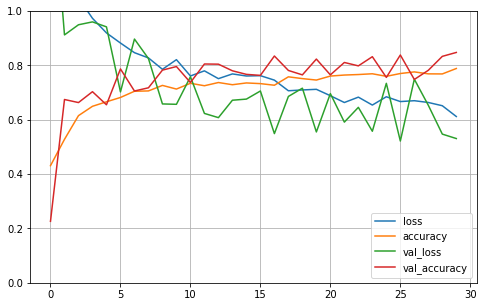

In [315]:
pd.DataFrame(model3_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [319]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 64)       

In [334]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model3)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 360ms/step


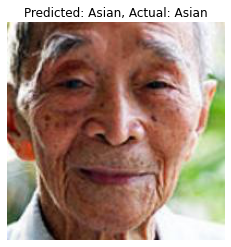

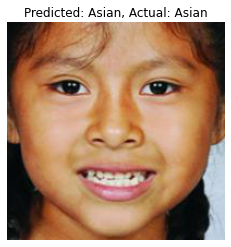

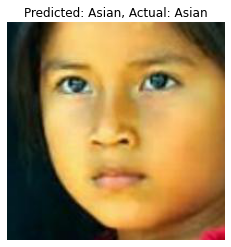

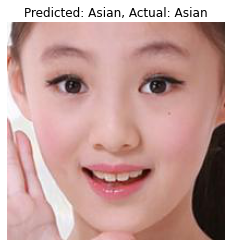

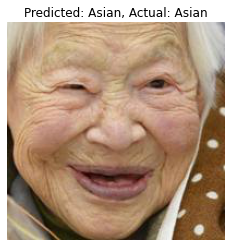

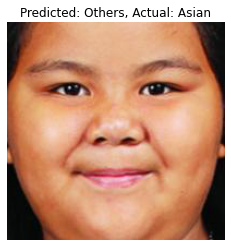

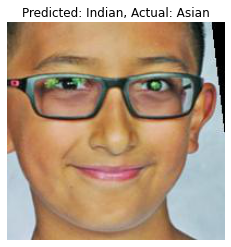

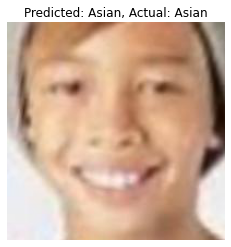

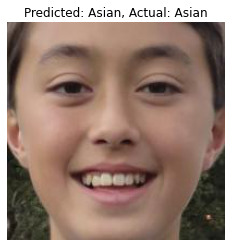

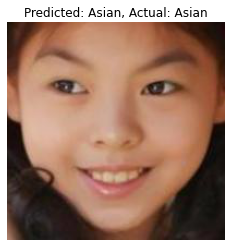

1/1 [==============================] - 0s 227ms/step


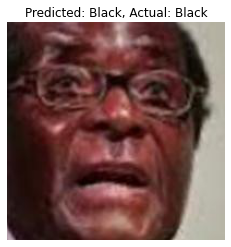

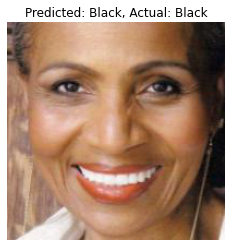

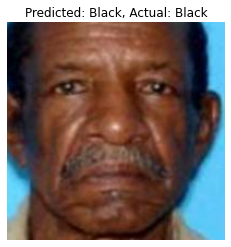

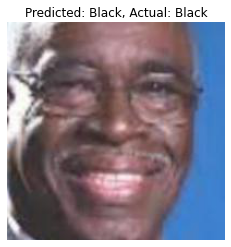

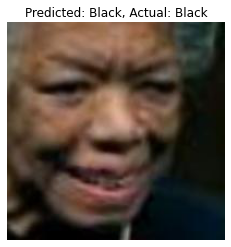

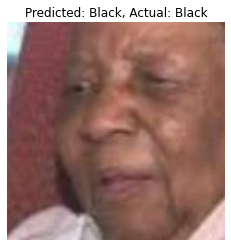

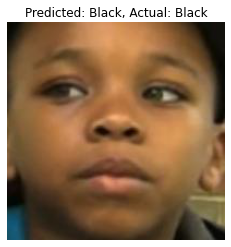

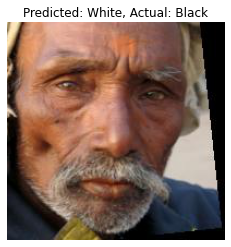

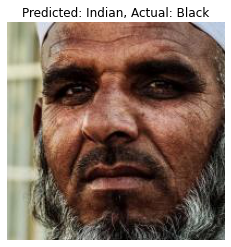

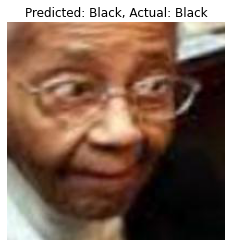

1/1 [==============================] - 0s 228ms/step


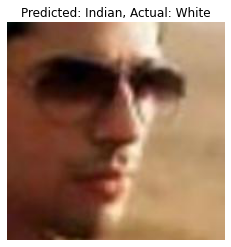

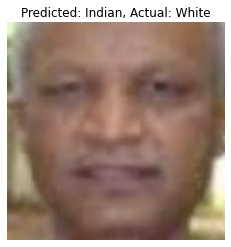

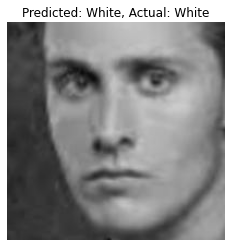

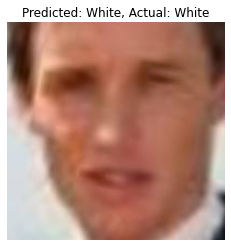

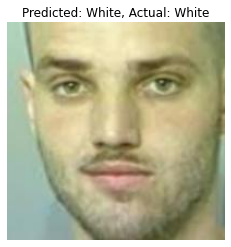

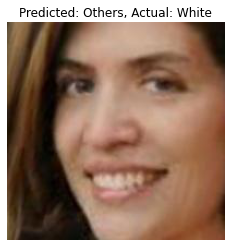

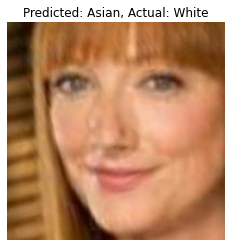

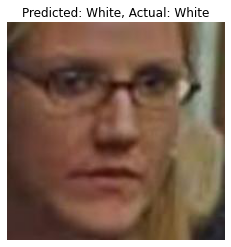

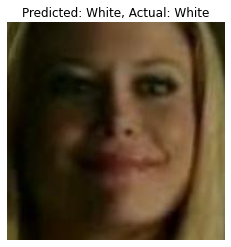

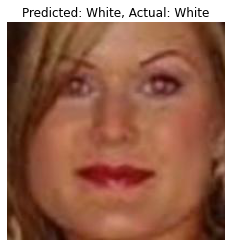

1/1 [==============================] - 0s 218ms/step


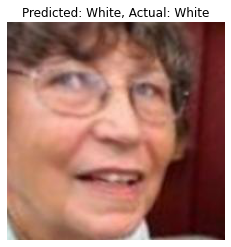

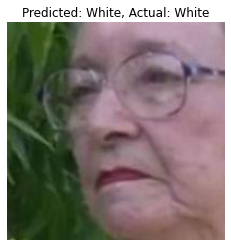

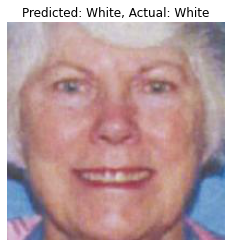

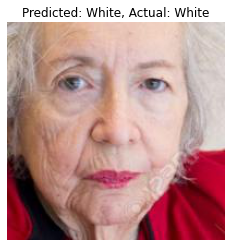

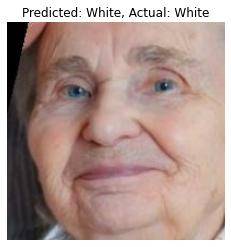

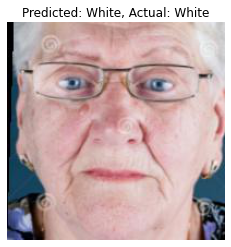

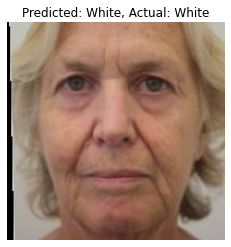

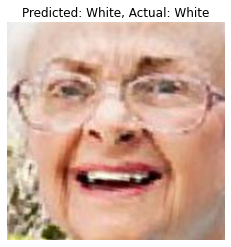

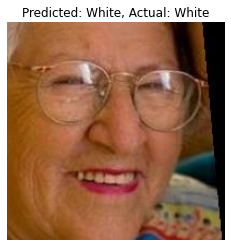

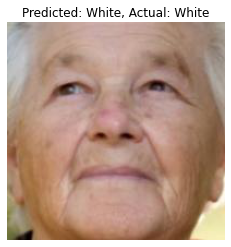

In [341]:
# Get the class labels and their corresponding indices
class_labels = list(test_generator.class_indices.keys())
class_indices = test_generator.class_indices

# Iterate over the test data generator
for i in [0,50,100,145]:
    # Get the batch of images and labels
    images, labels = test_generator[i]
    begin_idx = 32 * i 
    end_idx = begin_idx + 32
    filenames = test_generator.filenames[begin_idx:end_idx]
    predictions = model3.predict(images)

    # Get the predicted class labels and true class labels
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Print the predictions with actual labels
    for j in range(10):
        predicted_class = class_labels[predicted_labels[j]]
        true_class = class_labels[true_labels[j]]
#         true_age = filenames[j].split("/")[1].split("_")[0]

        # Plot the image
        plt.imshow(images[j])
        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
        plt.axis('off')
        plt.show()

In [ ]:
# Iterate over the test data generator
for i in [0,50,100,145]:
    # Get the batch of images and labels
    images, labels = test_generator[i]
    begin_idx = 32 * i 
    end_idx = begin_idx + 32
    filenames = test_generator.filenames[begin_idx:end_idx]
    predictions = model3.predict(images)

    # Get the predicted class labels and true class labels
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Print the predictions with actual labels
    for j in range(10):
        predicted_class = class_labels[predicted_labels[j]]
        true_class = class_labels[true_labels[j]]
#         true_age = filenames[j].split("/")[1].split("_")[0]

        # Plot the image
        plt.imshow(images[j])
        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
        plt.axis('off')
        plt.show()

In [343]:
class_labels

['Asian', 'Black', 'Indian', 'Others', 'White']

In [344]:
class_indices

{'Asian': 0, 'Black': 1, 'Indian': 2, 'Others': 3, 'White': 4}

In [470]:
# Testing the model on people we know...

eth_datagen = ImageDataGenerator(rescale=1./255)
eth_generator = eth_datagen.flow_from_directory("./dsuTest",
                                                 target_size = (200, 200),
                                                 batch_size = 46,
                                                 class_mode = 'categorical',
                                                  color_mode = 'rgb')

Found 46 images belonging to 5 classes.


In [433]:
eth_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [471]:
images, labels = eth_generator[0]

In [435]:
labels

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0.

In [436]:
eth_predictions = model3.predict(images)

2/2 [==============================] - 0s 90ms/step


In [437]:
test_true_labels = test_generator.classes 
test_predicted_probabilities = model3.predict(test_generator)

2023-06-06 01:54:56.132955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


149/149 [==============================] - 29s 194ms/step


In [438]:
train_labels = train_generator.classes

In [439]:
train_labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [440]:
test_predicted_labels = np.argmax(test_predicted_probabilities, axis=1)

In [441]:
len(test_predicted_labels)

4742

In [442]:
test_true_labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

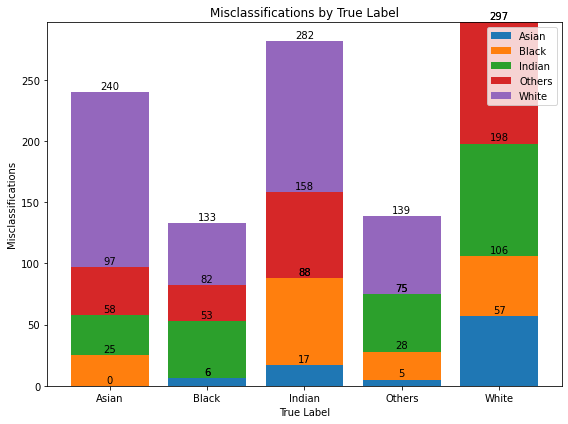

In [461]:
import numpy as np
import matplotlib.pyplot as plt

# Sample true and predicted labels (replace with your actual data)

# Define the list of ethnicity names (replace with your actual class names)
ethnicity_names = ['Asian', 'Black', 'Indian', 'Others', 'White']
# Compute the misclassifications
misclassifications = np.zeros((len(ethnicity_names), len(ethnicity_names)), dtype=int)
for true_label, predicted_label in zip(test_true_labels, test_predicted_labels):
    if true_label != predicted_label:
        misclassifications[true_label][predicted_label] += 1

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(ethnicity_names))
width = 0.8

bars = []
bottom = np.zeros(len(ethnicity_names))

for i in range(len(ethnicity_names)):
    bar = ax.bar(x, misclassifications[i], width, bottom=bottom, label=ethnicity_names[i])
    bars.append(bar)
    bottom += misclassifications[i]

# Add labels, title, and adjust layout
ax.set_xlabel('True Label')
ax.set_ylabel('Misclassifications')
ax.set_title('Misclassifications by True Label')
ax.set_xticks(x)
ax.set_xticklabels(ethnicity_names)
ax.legend()

# Add value labels on top of each bar
for bar in bars:
    ax.bar_label(bar, padding=1)

# Show the plot
plt.tight_layout()
plt.show()

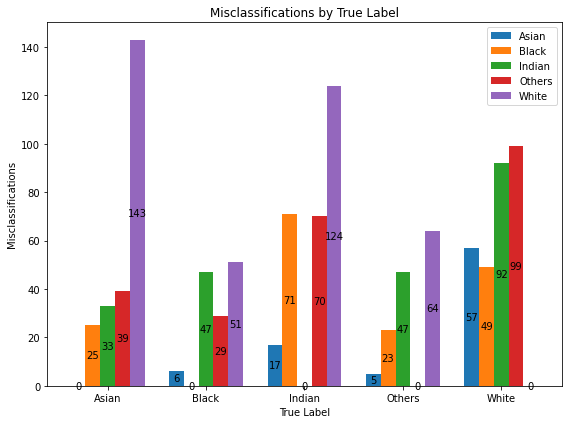

In [465]:
import numpy as np
import matplotlib.pyplot as plt

# Sample true and predicted labels (replace with your actual data)

# Define the list of ethnicity names (replace with your actual class names)
ethnicity_names = ['Asian', 'Black', 'Indian', 'Others', 'White']
# Compute the misclassifications
misclassifications = np.zeros((len(ethnicity_names), len(ethnicity_names)), dtype=int)
for true_label, predicted_label in zip(test_true_labels, test_predicted_labels):
    if true_label != predicted_label:
        misclassifications[true_label][predicted_label] += 1

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(ethnicity_names))
width = 0.15

bars = []
bottom = np.zeros(len(ethnicity_names))

for i in range(len(ethnicity_names)):
    if np.sum(misclassifications[i]) != 0:  # Exclude bars with all zeros
        bar = ax.bar(x + i * width, misclassifications[i], width, label=ethnicity_names[i])
        bars.append(bar)

# Add labels, title, and adjust layout
ax.set_xlabel('True Label')
ax.set_ylabel('Misclassifications')
ax.set_title('Misclassifications by True Label')
ax.set_xticks(x + width * (len(ethnicity_names) - 1) / 2)
ax.set_xticklabels(ethnicity_names)
ax.legend()

# Add value labels inside each bar
for i, bar in enumerate(bars):
    for rect in bar:
        height = rect.get_height()
        x_loc = rect.get_x() + rect.get_width() / 2
        y_loc = rect.get_y() + height / 2
        ax.text(x_loc, y_loc, f'{height}', ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [444]:
test_counts = {}

for index, element in enumerate(test_true_labels):
    # Check if the element is already in the dictionary
    if element in test_counts:
        # If it is, increment the count by 1
        test_counts[element] += 1
    else:
        # If it's not, add it to the dictionary with a count of 1
        test_counts[element] = 1
test_counts

{0: 706, 1: 920, 2: 813, 3: 316, 4: 1987}

In [446]:
train_counts = {}

for index, element in enumerate(train_labels):
    # Check if the element is already in the dictionary
    if element in train_counts:
        # If it is, increment the count by 1
        train_counts[element] += 1
    else:
        # If it's not, add it to the dictionary with a count of 1
        train_counts[element] = 1
train_counts


{0: 2728, 1: 3606, 2: 3162, 3: 1376, 4: 8091}

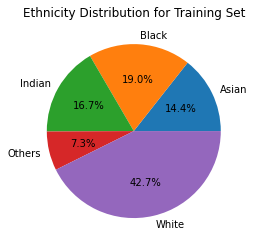

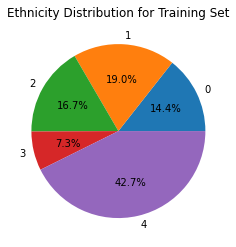

In [450]:
# Get the labels and values from the dictionary

# Dictionary to map original keys to desired labels
label_mapping = {0: 'Asian', 1: 'Black', 2: 'Indian', 3: 'Others', 4: 'White'}

# Get the labels and values from the dictionary, using the label_mapping dictionary for relabeling
labels = [label_mapping[key] for key in train_counts.keys()]
values = list(train_counts.values())

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Ethnicity Distribution for Training Set')

# Display the chart
plt.show()

labels = list(train_counts.keys())
values = list(train_counts.values())

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Ethnicity Distribution for Training Set')

# Display the chart
plt.show()

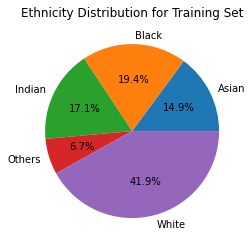

In [451]:
# Get the labels and values from the dictionary

# Dictionary to map original keys to desired labels
label_mapping = {0: 'Asian', 1: 'Black', 2: 'Indian', 3: 'Others', 4: 'White'}

# Get the labels and values from the dictionary, using the label_mapping dictionary for relabeling
labels = [label_mapping[key] for key in test_counts.keys()]
values = list(test_counts.values())

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Ethnicity Distribution for Training Set')

# Display the chart
plt.show()

In [447]:
pred_counts = {}

for index, element in enumerate(test_predicted_labels):
    # Check if the element is already in the dictionary
    if element in pred_counts:
        # If it is, increment the count by 1
        pred_counts[element] += 1
    else:
        # If it's not, add it to the dictionary with a count of 1
        pred_counts[element] = 1
pred_counts

{0: 861, 3: 218, 2: 876, 4: 1902, 1: 885}

In [413]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(test_true_labels, test_predicted_labels)
confusion_array

array([[ 621,    6,   17,    5,   57],
       [  25,  752,   71,   23,   49],
       [  33,   47,  594,   47,   92],
       [  39,   29,   70,   79,   99],
       [ 143,   51,  124,   64, 1605]])

[Text(0, 0.5, 'Asian'),
 Text(0, 1.5, 'Black'),
 Text(0, 2.5, 'Indian'),
 Text(0, 3.5, 'Others'),
 Text(0, 4.5, 'White')]

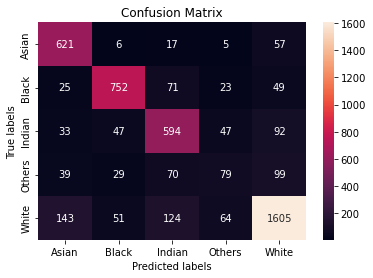

<Figure size 720x504 with 0 Axes>

In [373]:
ax = plt.subplot()
# df_cm = pd.DataFrame(confusion_array, index = ['Asian', 'Black', 'Indian', 'Others', 'White'],
#                   columns = ['Asian', 'Black', 'Indian', 'Others', 'White'])
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.figure(figsize = (10,7))
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Asian', 'Black', 'Indian', 'Others', 'White'])
ax.yaxis.set_ticklabels(['Asian', 'Black', 'Indian', 'Others', 'White'])

In [374]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_true_labels, test_predicted_labels)

In [375]:
accuracy

0.7699283002952341

In [378]:
from tensorflow.keras.models import load_model

model = load_model('/Users/hairanliang/Downloads/eth_cnn_model_85%')
model2 = load_model('/Users/hairanliang/Downloads/eth_cnn_model')

In [392]:
test_loss, test_accuracy = model.evaluate(test_generator)

2023-06-06 01:34:13.419204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


149/149 [==============================] - 28s 186ms/step - loss: 0.6810 - accuracy: 0.7699


In [393]:
test_accuracy

0.7699282765388489

In [379]:
test_loss, test_accuracy = model2.evaluate(test_generator)

2023-06-05 23:41:48.961087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


149/149 [==============================] - 27s 178ms/step - loss: 0.7438 - accuracy: 0.7425


In [351]:
eth_class_labels = list(eth_generator.class_indices.keys())
eth_class_indices = eth_generator.class_indices

In [518]:
# Testing the model on people we know...

eth_datagen = ImageDataGenerator(rescale=1./255)
eth_generator = eth_datagen.flow_from_directory("./dsuTest",
                                                 target_size = (200, 200),
                                                 batch_size = 47,
                                                 class_mode = 'categorical',
                                                  color_mode = 'rgb')

Found 47 images belonging to 5 classes.


In [519]:
images, labels = eth_generator[0]

In [520]:
eth_predictions = model3.predict(images)

2/2 [==============================] - 0s 108ms/step


{'As.': 0.447375, 'Bl.': 0.2294, 'Ind.': 0.00811, 'Oth.': 0.024889, 'Wh.': 0.290226}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[44.74 22.94  0.81  2.49 29.02]


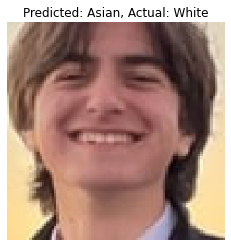

{'As.': 0.373572, 'Bl.': 0.163303, 'Ind.': 0.017304, 'Oth.': 0.061374, 'Wh.': 0.384447}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[37.36 16.33  1.73  6.14 38.44]


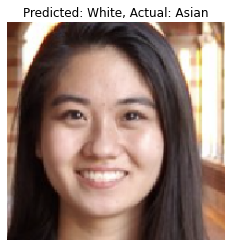

{'As.': 0.144178, 'Bl.': 0.303363, 'Ind.': 0.055189, 'Oth.': 0.159637, 'Wh.': 0.337632}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[14.42 30.34  5.52 15.96 33.76]


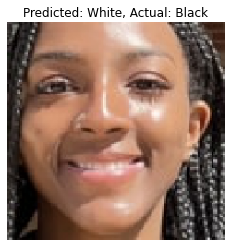

{'As.': 0.771353, 'Bl.': 0.22079, 'Ind.': 0.000512, 'Oth.': 0.000394, 'Wh.': 0.00695}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[77.14 22.08  0.05  0.04  0.7 ]


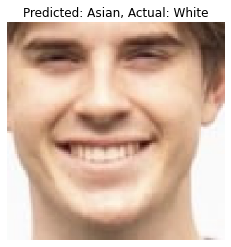

{'As.': 0.076865, 'Bl.': 0.028119, 'Ind.': 0.156095, 'Oth.': 0.082261, 'Wh.': 0.656659}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 7.69  2.81 15.61  8.23 65.67]


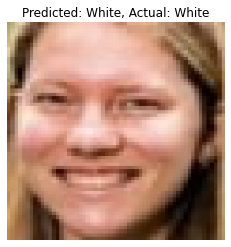

{'As.': 0.905599, 'Bl.': 4.2e-05, 'Ind.': 0.000328, 'Oth.': 0.001748, 'Wh.': 0.092283}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[90.56  0.    0.03  0.17  9.23]


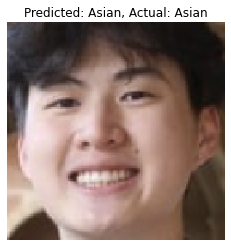

{'As.': 0.911348, 'Bl.': 0.004951, 'Ind.': 0.005579, 'Oth.': 0.005983, 'Wh.': 0.072138}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[91.13  0.5   0.56  0.6   7.21]


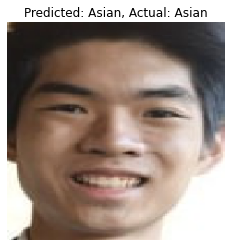

{'As.': 0.082704, 'Bl.': 0.020578, 'Ind.': 0.296934, 'Oth.': 0.236077, 'Wh.': 0.363707}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 8.27  2.06 29.69 23.61 36.37]


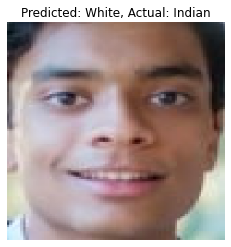

{'As.': 0.204744, 'Bl.': 0.310043, 'Ind.': 0.021228, 'Oth.': 0.050394, 'Wh.': 0.413591}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[20.47 31.    2.12  5.04 41.36]


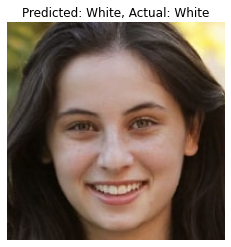

{'As.': 0.366228, 'Bl.': 0.078501, 'Ind.': 0.055608, 'Oth.': 0.009845, 'Wh.': 0.489818}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[36.62  7.85  5.56  0.98 48.98]


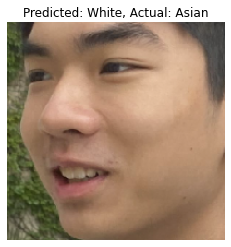

{'As.': 0.283556, 'Bl.': 0.001481, 'Ind.': 0.101143, 'Oth.': 0.182425, 'Wh.': 0.431395}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[28.36  0.15 10.11 18.24 43.14]


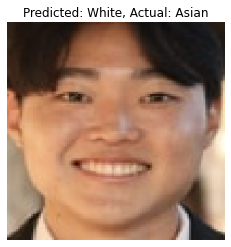

{'As.': 0.093735, 'Bl.': 0.069593, 'Ind.': 0.042535, 'Oth.': 0.05859, 'Wh.': 0.735547}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 9.37  6.96  4.25  5.86 73.55]


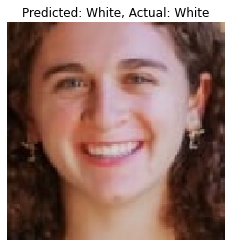

{'As.': 0.989314, 'Bl.': 0.003858, 'Ind.': 0.000828, 'Oth.': 0.001631, 'Wh.': 0.00437}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[98.93  0.39  0.08  0.16  0.44]


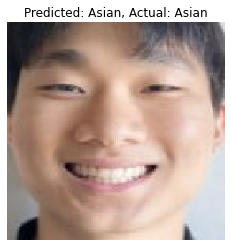

{'As.': 0.018024, 'Bl.': 0.049444, 'Ind.': 0.820326, 'Oth.': 0.089137, 'Wh.': 0.02307}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 1.8   4.94 82.03  8.91  2.31]


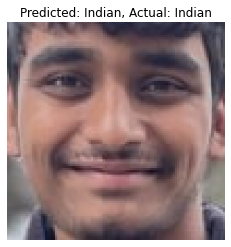

{'As.': 0.10275, 'Bl.': 0.039911, 'Ind.': 0.031887, 'Oth.': 0.116395, 'Wh.': 0.709057}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[10.27  3.99  3.19 11.64 70.91]


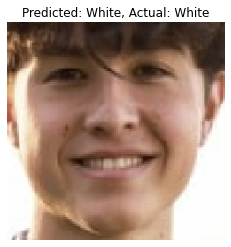

{'As.': 0.002691, 'Bl.': 0.033768, 'Ind.': 0.512017, 'Oth.': 0.278127, 'Wh.': 0.173397}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 0.27  3.38 51.2  27.81 17.34]


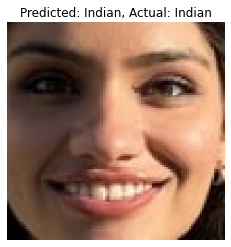

{'As.': 0.993474, 'Bl.': 2.4e-05, 'Ind.': 4.9e-05, 'Oth.': 0.003573, 'Wh.': 0.00288}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[99.35  0.    0.    0.36  0.29]


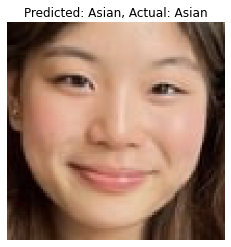

{'As.': 0.127929, 'Bl.': 0.364344, 'Ind.': 0.005159, 'Oth.': 0.014847, 'Wh.': 0.487721}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[12.79 36.43  0.52  1.48 48.77]


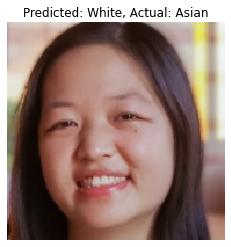

{'As.': 0.000217, 'Bl.': 0.00018, 'Ind.': 0.001037, 'Oth.': 0.016812, 'Wh.': 0.981754}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 0.02  0.02  0.1   1.68 98.18]


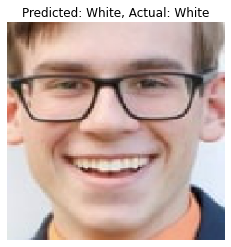

{'As.': 0.379548, 'Bl.': 0.048435, 'Ind.': 0.062341, 'Oth.': 0.057257, 'Wh.': 0.452419}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[37.95  4.84  6.23  5.73 45.24]


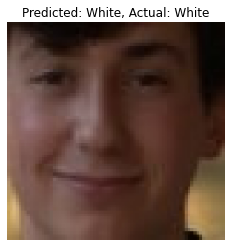

{'As.': 0.106328, 'Bl.': 0.12701, 'Ind.': 0.292783, 'Oth.': 0.200595, 'Wh.': 0.273283}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[10.63 12.7  29.28 20.06 27.33]


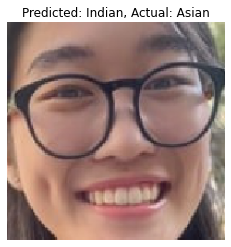

{'As.': 0.142211, 'Bl.': 0.000754, 'Ind.': 0.027161, 'Oth.': 0.009801, 'Wh.': 0.820073}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[14.22  0.08  2.72  0.98 82.01]


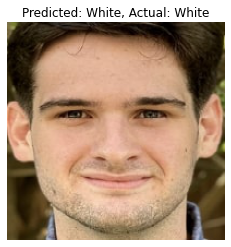

{'As.': 0.723502, 'Bl.': 0.007159, 'Ind.': 0.07586, 'Oth.': 0.0345, 'Wh.': 0.158979}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[72.35  0.72  7.59  3.45 15.9 ]


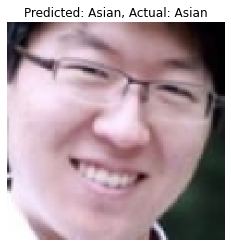

{'As.': 0.968971, 'Bl.': 0.002782, 'Ind.': 0.005527, 'Oth.': 0.018897, 'Wh.': 0.003823}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[96.9   0.28  0.55  1.89  0.38]


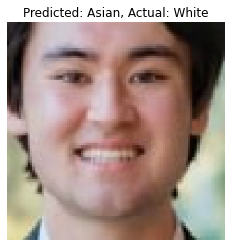

{'As.': 0.053042, 'Bl.': 0.25129, 'Ind.': 0.016665, 'Oth.': 0.226625, 'Wh.': 0.452378}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 5.3  25.13  1.67 22.66 45.24]


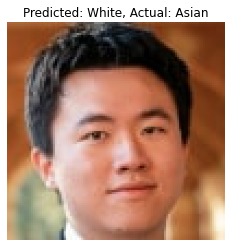

{'As.': 0.623642, 'Bl.': 0.009938, 'Ind.': 0.01592, 'Oth.': 0.023679, 'Wh.': 0.326822}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[62.36  0.99  1.59  2.37 32.68]


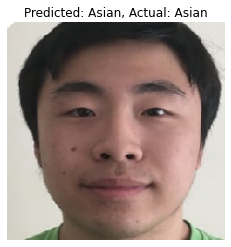

{'As.': 0.059903, 'Bl.': 0.020136, 'Ind.': 0.645844, 'Oth.': 0.175364, 'Wh.': 0.098754}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 5.99  2.01 64.58 17.54  9.88]


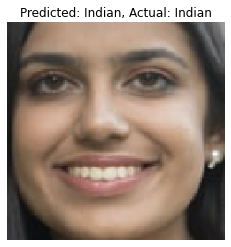

{'As.': 0.165702, 'Bl.': 0.001763, 'Ind.': 0.287834, 'Oth.': 0.105408, 'Wh.': 0.439292}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[16.57  0.18 28.78 10.54 43.93]


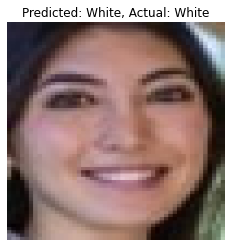

{'As.': 0.05016, 'Bl.': 0.011533, 'Ind.': 0.718296, 'Oth.': 0.029494, 'Wh.': 0.190518}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 5.02  1.15 71.83  2.95 19.05]


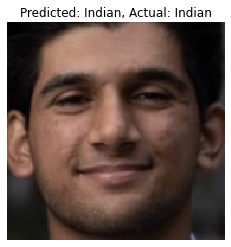

{'As.': 0.659261, 'Bl.': 0.025069, 'Ind.': 0.046281, 'Oth.': 0.068285, 'Wh.': 0.201103}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[65.93  2.51  4.63  6.83 20.11]


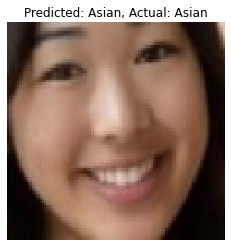

{'As.': 0.506375, 'Bl.': 0.06241, 'Ind.': 0.075496, 'Oth.': 0.22515, 'Wh.': 0.130569}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[50.64  6.24  7.55 22.52 13.06]


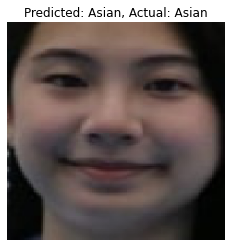

{'As.': 0.059785, 'Bl.': 0.888352, 'Ind.': 0.003146, 'Oth.': 0.027365, 'Wh.': 0.021351}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 5.98 88.84  0.31  2.74  2.14]


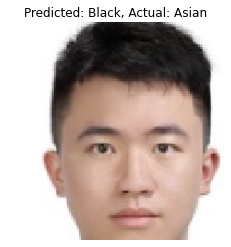

{'As.': 0.935947, 'Bl.': 0.002695, 'Ind.': 0.024463, 'Oth.': 0.02567, 'Wh.': 0.011225}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[93.59  0.27  2.45  2.57  1.12]


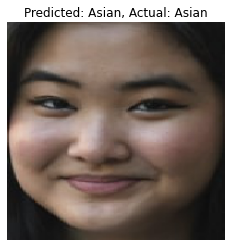

{'As.': 0.01538, 'Bl.': 0.073389, 'Ind.': 0.281004, 'Oth.': 0.164564, 'Wh.': 0.465664}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 1.54  7.34 28.1  16.46 46.57]


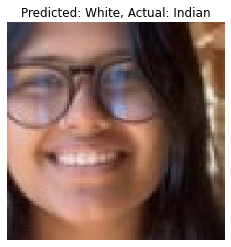

{'As.': 0.727449, 'Bl.': 0.00681, 'Ind.': 0.007519, 'Oth.': 0.058159, 'Wh.': 0.200063}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[72.74  0.68  0.75  5.82 20.01]


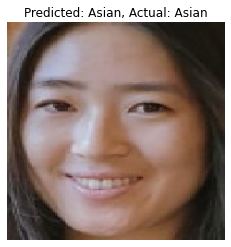

{'As.': 0.036499, 'Bl.': 0.023427, 'Ind.': 0.116327, 'Oth.': 0.064799, 'Wh.': 0.758948}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 3.65  2.34 11.63  6.48 75.89]


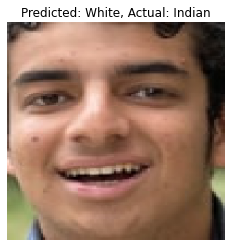

{'As.': 0.854791, 'Bl.': 0.00083, 'Ind.': 0.019727, 'Oth.': 0.010754, 'Wh.': 0.113898}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[85.48  0.08  1.97  1.08 11.39]


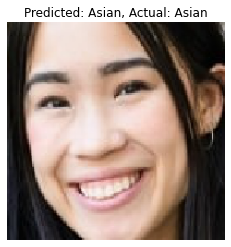

{'As.': 0.174651, 'Bl.': 0.095798, 'Ind.': 0.012462, 'Oth.': 0.015132, 'Wh.': 0.701957}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[17.47  9.58  1.25  1.51 70.2 ]


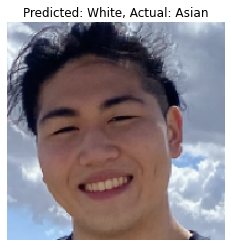

{'As.': 0.135499, 'Bl.': 0.010458, 'Ind.': 0.057333, 'Oth.': 0.258927, 'Wh.': 0.537783}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[13.55  1.05  5.73 25.89 53.78]


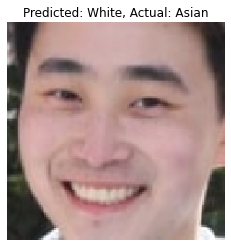

{'As.': 0.053593, 'Bl.': 0.047098, 'Ind.': 0.652383, 'Oth.': 0.130251, 'Wh.': 0.116675}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 5.36  4.71 65.24 13.03 11.67]


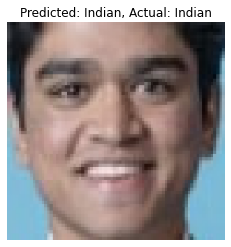

{'As.': 0.113401, 'Bl.': 0.023301, 'Ind.': 0.057275, 'Oth.': 0.071554, 'Wh.': 0.734469}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[11.34  2.33  5.73  7.16 73.45]


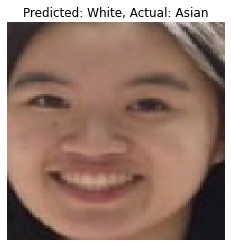

{'As.': 0.105904, 'Bl.': 0.129965, 'Ind.': 0.079006, 'Oth.': 0.099753, 'Wh.': 0.585372}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[10.59 13.    7.9   9.98 58.54]


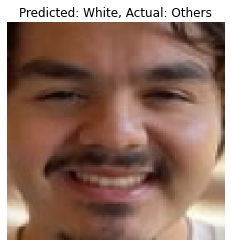

{'As.': 0.428397, 'Bl.': 0.025006, 'Ind.': 0.015016, 'Oth.': 0.116205, 'Wh.': 0.415376}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[42.84  2.5   1.5  11.62 41.54]


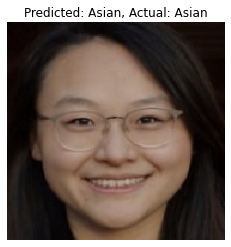

{'As.': 0.556255, 'Bl.': 0.003308, 'Ind.': 0.024539, 'Oth.': 0.025744, 'Wh.': 0.390155}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[55.63  0.33  2.45  2.57 39.02]


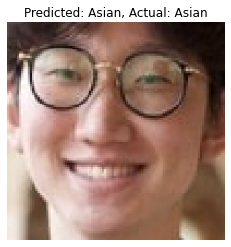

{'As.': 0.033438, 'Bl.': 0.00896, 'Ind.': 0.015431, 'Oth.': 0.03727, 'Wh.': 0.9049}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 3.34  0.9   1.54  3.73 90.49]


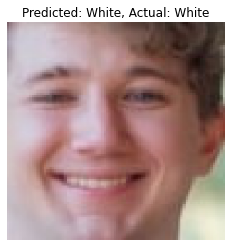

{'As.': 0.219677, 'Bl.': 0.323467, 'Ind.': 0.205373, 'Oth.': 0.069011, 'Wh.': 0.182472}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[21.97 32.35 20.54  6.9  18.25]


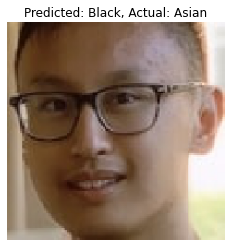

{'As.': 0.024945, 'Bl.': 0.036936, 'Ind.': 0.010734, 'Oth.': 0.027686, 'Wh.': 0.899698}
['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
[ 2.49  3.69  1.07  2.77 89.97]


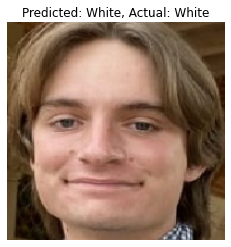

In [521]:
correct = 0
keys = ['As.', 'Bl.', 'Ind.', 'Oth.', 'Wh.']
for x in range(47):
    predicted_label = np.argmax(eth_predictions, axis=1)[x]
    true_label = np.argmax(labels[x])
    predicted_class = eth_class_labels[predicted_label]
    true_class = eth_class_labels[true_label]
    np.set_printoptions(precision=3, suppress=True)
    rounded_eth = np.round(eth_predictions[x],decimals = 6)
    combined_dict = dict(zip(keys, rounded_eth))
    perc = eth_predictions[x] * 100
    np.set_printoptions(precision=2, suppress=True)
    print(combined_dict)
    print(keys)
    print(f'{perc}')

    plt.imshow(images[x])
    plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
    plt.axis('off')
    plt.show()
    if predicted_class == true_class:
        correct += 1
accuracy = correct / 45


In [478]:
accuracy

0.6222222222222222